In [1]:
'''
Based on the video:
https://www.youtube.com/watch?v=QIUxPv5PJOY
'''

'\nBased on the video:\nhttps://www.youtube.com/watch?v=QIUxPv5PJOY\n'

In [2]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [3]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [5]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,270.128906
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.817261
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,274.498535


In [6]:
# Get the number of rows and columns in the dataset
df.shape

(2003, 6)

C:\Users\alex\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


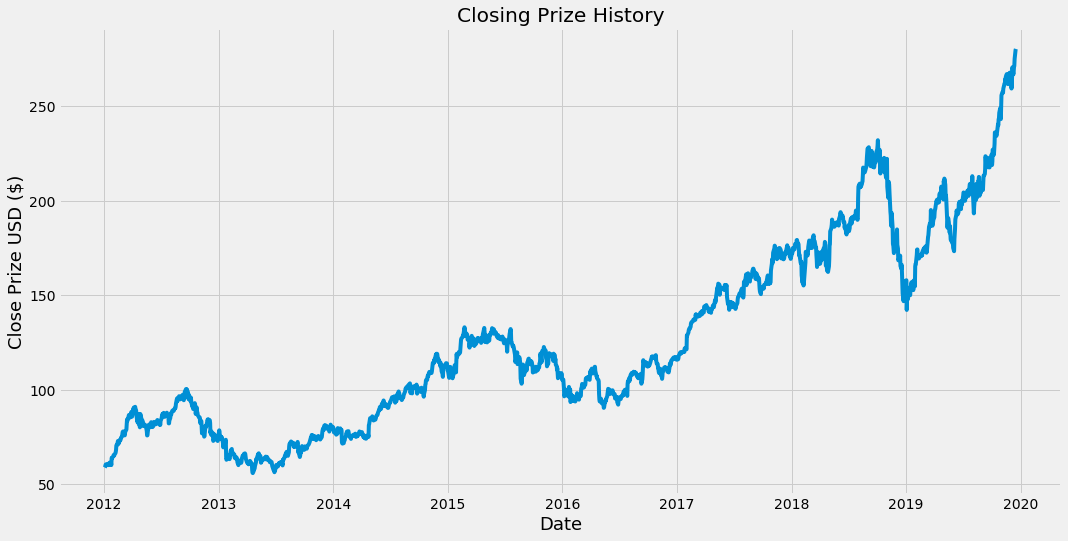

In [7]:
# Visualize the closing prize history
plt.figure(figsize=(16, 8))
plt.plot(df['Close'])
plt.title('Closing Prize History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prize USD ($)', fontsize=18)
plt.show()

In [8]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe into a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1603

In [9]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [11]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) # will contain the first 60 values (index 0 to 59)
    y_train.append(train_data[i, 0]) # will contain the 61st value (index 61)
    
    if i <= 60:
        print(x_train)
        print(y_train)
        print() # not sure why this is here

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [12]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
# Reshape the data
# (number of samples, number of timesteps, number of features)
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1543, 60)
(1543, 60, 1)


In [14]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# input shape (number of timesteps, number of features)
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1543/1543 [==============================] - 183s 119ms/step - loss: 6.5675e-04


In [17]:
# Create the testing dataset
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60:, :]
# Create the datasets x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test

[array([0.51322235, 0.51958863, 0.53294452, 0.54839284, 0.54581069,
        0.54460864, 0.53071854, 0.53610544, 0.53882114, 0.53815331,
        0.53085209, 0.53935536, 0.55288929, 0.56063573, 0.5528448 ,
        0.5460333 , 0.54696818, 0.54416348, 0.53205414, 0.53178703,
        0.51411273, 0.50333899, 0.4859318 , 0.52079068, 0.50106844,
        0.49278779, 0.49857536, 0.49367817, 0.50129106, 0.51562638,
        0.52092423, 0.50124656, 0.50868133, 0.5229276 , 0.51932152,
        0.52688985, 0.52951649, 0.53436918, 0.54514292, 0.5433621 ,
        0.52092423, 0.48940432, 0.4872674 , 0.47702787, 0.48018873,
        0.48272638, 0.47426767, 0.48735639, 0.50445198, 0.53770815,
        0.53913274, 0.57002938, 0.5759505 , 0.57991274, 0.5857448 ,
        0.59767603, 0.5912207 , 0.58926183, 0.58164901, 0.58939538]),
 array([0.51958863, 0.53294452, 0.54839284, 0.54581069, 0.54460864,
        0.53071854, 0.53610544, 0.53882114, 0.53815331, 0.53085209,
        0.53935536, 0.55288929, 0.56063573, 0.

In [18]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
# Reshape the data
print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(400, 60)
(400, 60, 1)


In [20]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [21]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(y_test - predictions)**2)
rmse

2.5182621002197267

C:\Users\alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


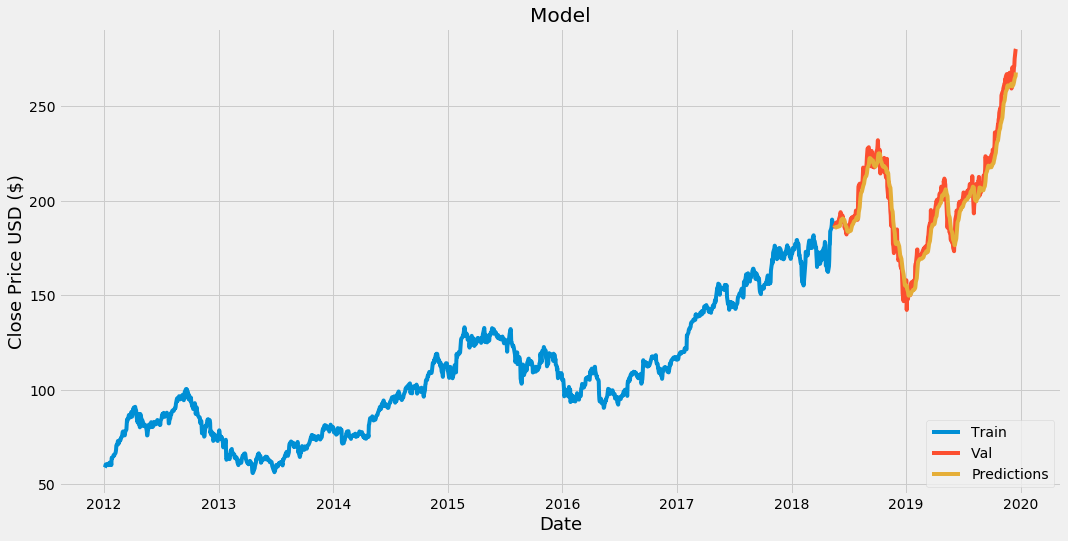

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
'''
I'm worried that the model just seems to be copying what the general trend is and not actually predicting anything. Look at 
how the yellow part just seems to be following the red part around. Yellow is always on the right, and not on top of the 
red, indicating the model is just following the market around. This model would maybe not be so good for actual investing.
'''

In [24]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,185.628326
2018-05-18,186.309998,185.858719
2018-05-21,187.630005,185.840881
2018-05-22,187.160004,185.886429
2018-05-23,188.360001,185.889160
...,...,...
2019-12-11,270.769989,262.805695
2019-12-12,271.459991,263.720551
2019-12-13,275.149994,264.686401
